In [35]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c
from astropy.io import fits
from photutils import DAOStarFinder, aperture_photometry, CircularAperture
from astropy.stats import mad_std
import astroquery
import heapq as hq

In [36]:
def PrintStats(image):
    print('Min:',image.min())
    print('Max:',image.max())
    print('Median:',np.median(image))
    print('Std: ',np.std(image))
    return
def ShowImage(image,med=None,std=None,sigma=3,colorbar=True,vmin=None,vmax=None,stats=True,figsize=(8,8),show=True):
    if med==None:
        med = np.median(image)
    if std==None:
        std = np.std(image)
    plt.figure(figsize=figsize)
    if vmin == None:
        vmin=med-sigma*std
    if vmax == None:
        vmax=med+sigma*std
    #print('vmin',vmin,'vmax',vmax)
    if stats:
        PrintStats(image)
    plt.imshow(image,vmin=vmin,vmax=vmax,interpolation='none',cmap='gray_r')
    if colorbar:
        plt.colorbar()
    if show:
        plt.show()
    return

In [37]:
# Read the image and header from the FITS file
with fits.open('mthopkinsdata/data_processed.fits') as hdu:
    image = hdu[0].data.copy()
    hdr = hdu[0].header.copy()
with fits.open('mthopkinsdata/data_from_dss.fits') as dss:
    imagedss = dss[0].data.copy()
    dss_r= dss[0].header.copy()
with fits.open('mthopkinsdata/Stein2051_2MASS-J_ap.fits') as mass:
    image2mass = mass[0].data.copy()
    mass_r = mass[0].header.copy()

In [38]:
image_srcfind = image
    #[2048-256+512:2048+256+512,2048-256+512:2048+256+512]
image_srcfind -= np.median(image_srcfind) 

image_dssfind = imagedss
#image_dssfind -= np.median(image_dssfind)

Min: -216.001951389
Max: 38740.7049528
Median: 0.0
Std:  92.0194600299


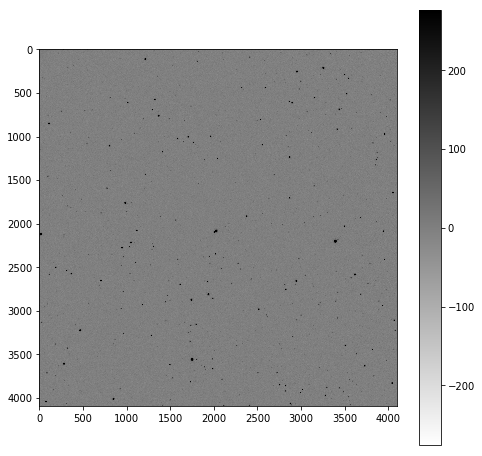

In [39]:
ShowImage(image_srcfind)

In [40]:
fwhm = 8.
bkg_sigma = mad_std(image_srcfind)   
daofind = DAOStarFinder(fwhm=fwhm, threshold=4.*bkg_sigma)
sources = daofind(image_srcfind) 
print(sources)
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=fwhm)
phot_table = aperture_photometry(image, apertures)

 id    xcentroid     ycentroid   ...      flux            mag       
---- ------------- ------------- ... ------------- -----------------
   1  1.7387734432 3.11672042432 ... 2.30762224127   -0.907911790282
   2 2725.41479472 2.27475276484 ... 1.15044279252   -0.152162569005
   3 1064.69584076 4.21033954799 ... 1.80875775268      -0.643451014
   4 3928.63452046 5.52163702729 ... 1.35030493689   -0.326079638741
   5 249.928599653 8.51205138278 ... 1.09639336321  -0.0999159949053
   6 281.407693736 7.55001040468 ... 120.393166631    -5.20150459399
   7 1500.25227923  6.0954253401 ... 1.57518444184   -0.493328534017
   8 3596.42597838 7.37766708705 ... 1.12323510917   -0.126176674557
   9 3878.58275084 7.24796012766 ... 1.06478303483  -0.0681528072914
  10 4086.78396142 7.92227538934 ... 1.03264106381  -0.0348734778197
 ...           ...           ... ...           ...               ...
1926 1412.83714898 4087.21801362 ...  12.506864218    -2.74287108727
1927 3356.30424583 4087.84860305 .

## Question 2

In [41]:
top5 = hq.nlargest(5, zip(sources['flux'], sources['id'], sources['xcentroid'], sources['ycentroid']))

In [44]:
sources.sort('flux')
print(sources)

 id    xcentroid     ycentroid   ...      flux            mag        
---- ------------- ------------- ... ------------- ------------------
 243  4054.7916698 401.215176911 ... 1.00006961889 -7.55851189255e-05
 641 1543.20330074 1248.52389954 ... 1.00019193645 -0.000208372353735
 245 185.218537118 401.835917514 ... 1.00019730881 -0.000214204185266
1177 1788.40845085 2528.49789224 ... 1.00049183897 -0.000533876092389
1198 531.905973541 2564.44517903 ... 1.00058066791  -0.00063026920315
1196 3594.67283663 2559.27158459 ... 1.00061617364 -0.000668796000161
1194 3677.59050989 2554.13279568 ... 1.00076665082 -0.000832061637979
 255 3188.31853726 416.368089275 ... 1.00077854487 -0.000844965470371
 865 1364.70411828 1844.93971911 ... 1.00116991585  -0.00126947754751
1356 146.634038395 2973.48453307 ... 1.00202263293  -0.00219382789331
 ...           ...           ... ...           ...                ...
 441 1369.42153597 772.354645567 ... 326.821045652     -6.28577503792
  85 1216.31331265 1

In [64]:
sources[-5:]['flux']
top5 = sources[-5:]
top5coordinates = (top5['xcentroid'], top5['ycentroid'])
aperturesTop5 = CircularAperture(top5coordinates, r=fwhm)
print(aperturesTop5)

Aperture: CircularAperture
positions: [[ 3253.97205273,   225.4029082 ],
            [   21.32570796,  2126.61848705],
            [ 2027.38482562,  2090.29778964],
            [ 1751.29033755,  3561.31360591],
            [ 3390.18089975,  2209.24540623]]
r: 8.0


In [65]:
phot_table2 = aperture_photometry(image, aperturesTop5)
print(phot_table2)

 id      xcenter            ycenter        aperture_sum
           pix                pix                      
--- ------------------ ------------------ -------------
  1 3253.9720527311915 225.40290819973728 619349.550031
  2  21.32570795877234  2126.618487048314  842878.48343
  3 2027.3848256158828 2090.2977896402313 1937913.15544
  4 1751.2903375495055  3561.313605905526 1942482.72215
  5  3390.180899752138 2209.2454062331235 2466302.24807


Min: -216.001951389
Max: 38740.7049528
Median: 0.0
Std:  92.0194600299


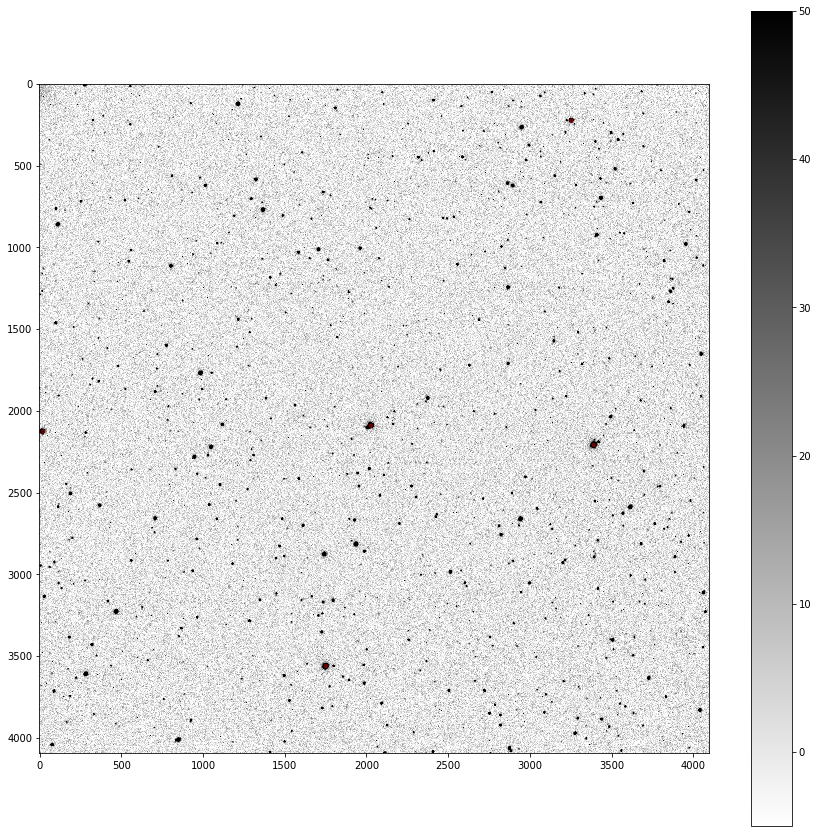

In [66]:
#top5coordinates = (top5[2], top5[3])

#top5coordinates = (sources)
aperturesTop5 = CircularAperture(top5coordinates, r=fwhm)
ShowImage(image_srcfind,figsize=(15,15),vmin=-5,vmax=50,show=False)
aperturesTop5.plot(color='red', lw=1.5, alpha=0.5)
#apertures.plot(color='cyan', lw=1.5, alpha=0.5)

plt.show()

### Q2. These 5 circles do not match what visually look like the brightest. (See above; the cyan circles are very small)

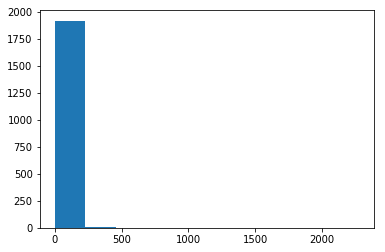

In [17]:
np.histogram(sources['flux'])
plt.hist(sources['flux'])
plt.show()

### Q3. See attached additonal histograms. The standard deviation of fluxes is:

In [11]:
np.std(sources['flux'])

87.943037855190241

### Q4. First image is original. Second image is from DSS. 2MASS image could not be retrieved ("Unable to load fits")

Min: -216.001951389
Max: 38740.7049528
Median: 0.0
Std:  92.0194600299


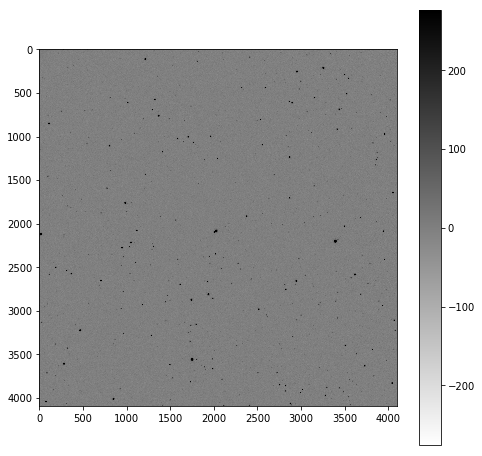

In [12]:
ShowImage(image_srcfind)

Min: 1656
Max: 13152
Median: 2682.0
Std:  1115.16485496


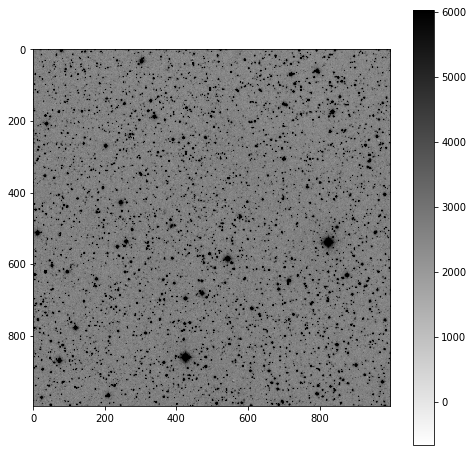

In [13]:
ShowImage(image_dssfind)

### Q4 cont. RA/Dec Img 1. 4:31:14.5 , +58:58:00 on 2017-12-13T07:41:00
### Img 2 (from DSS). 4:31:03 , +59:00:13 on 11/02/53.


Min: -216.001951389
Max: 38740.7049528
Median: 0.0
Std:  92.0194600299


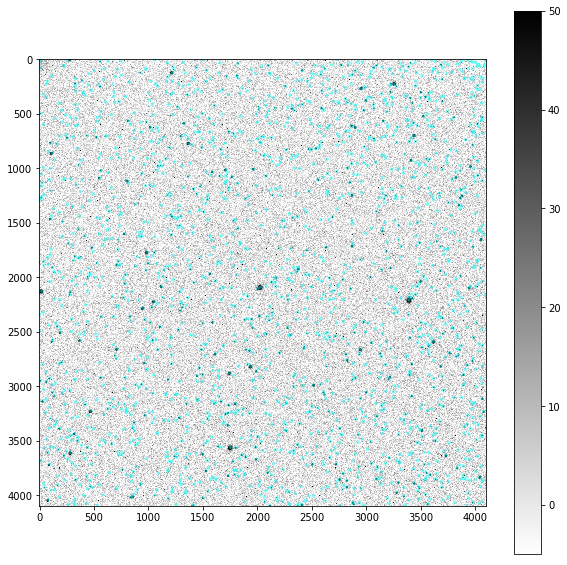

In [14]:
#plt.figure(figsize=(10,10))
#plt.imshow(image_srcfind, cmap='gray_r', origin='lower')
ShowImage(image_srcfind,figsize=(10,10),vmin=-5,vmax=50,show=False)
apertures.plot(color='cyan', lw=1.5, alpha=0.5)
plt.show()

In [15]:
from scipy.ndimage.filters import gaussian_filter as gf

Min: -7.15207652511
Max: 14973.5038854
Median: -0.144700228695
Std:  59.5981141046


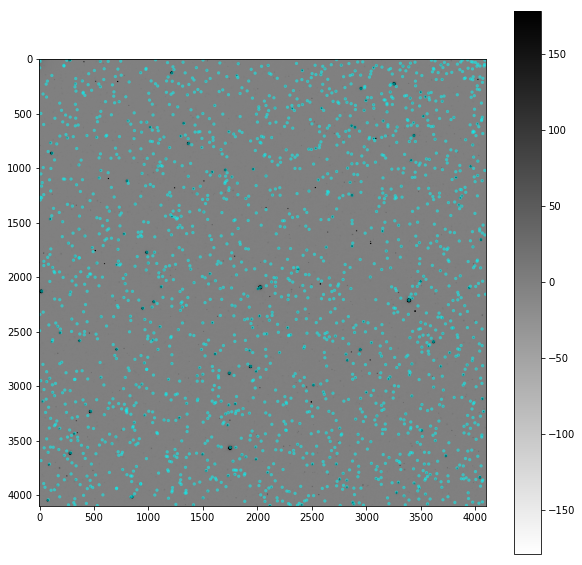

In [16]:
sigma=4
ShowImage(gf(image_srcfind,sigma),figsize=(10,10),show=False)
apertures.plot(color='cyan', lw=1.5, alpha=0.5)
plt.show()